<!-- 
 * @file        9_vehicle_dynamics.ipynb
 * @brief       Vehicle Dynamics and Longitudinal/Lateral Control
 * 
 * @authors     Jaehwan Lee (idljh5529@gmail.com)      
 *
 * @date        2025-08-14 Released by AI Lab, Hanyang University
 * 
-->

# 9. Vehicle Dynamics & Ï¢ÖÌö°Î∞©Ìñ• Ï†úÏñ¥
Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî Ï∞®ÎüâÏùò ÎèôÏó≠Ìïô Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌïòÍ≥† Ï¢ÖÎ∞©Ìñ• Î∞è Ìö°Î∞©Ìñ• Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌïôÏäµÌï©ÎãàÎã§.

## Ïã§Ïäµ Î™©Ìëú
1. **Ï∞®Îüâ ÎèôÏó≠Ìïô Î™®Îç∏ Íµ¨ÌòÑ**: Ï¢ÖÎ∞©Ìñ• dynamic Î™®Îç∏Í≥º Ìö°Î∞©Ìñ• kinematic/dynamic Î™®Îç∏ Íµ¨ÌòÑ
2. **ÏÜçÎèÑ Í∏∞Î∞ò Î™®Îç∏ Ïä§ÏúÑÏπ≠**: ÏÜçÎèÑÏóê Îî∞Î•∏ Ìö°Î∞©Ìñ• Î™®Îç∏ ÏûêÎèô Ï†ÑÌôò (kinematic ‚Üî dynamic)
3. **Ï¢ÖÌö°Î∞©Ìñ• Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò**: Pure Pursuit, Stanley Ï†úÏñ¥ Î∞è PID ÏÜçÎèÑ Ï†úÏñ¥ Íµ¨ÌòÑ
4. **Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖò**: ÌÜµÌï© Ï†úÏñ¥ ÏãúÏä§ÌÖúÏùÑ ÌÜµÌïú Ïã§ÏãúÍ∞Ñ Í≤ΩÎ°ú Ï∂îÏ¢Ö

## Îã§Î£®Îäî Ï∞®Îüâ ÎèôÏó≠Ìïô Î™®Îç∏
- **Ï¢ÖÎ∞©Ìñ• Dynamic Model**: Î™®ÌÑ∞ ÌÜ†ÌÅ¨, Í≥µÍ∏∞Ï†ÄÌï≠, Íµ¨Î¶ÑÏ†ÄÌï≠ Í≥†Î†§
- **Ìö°Î∞©Ìñ• Kinematic Model**: Ï†ÄÏÜç Ï£ºÌñâ Ïãú (v < 5 m/s)
- **Ìö°Î∞©Ìñ• Dynamic Model**: Í≥†ÏÜç Ï£ºÌñâ Ïãú (v ‚â• 5 m/s)

## Ïã§Ïäµ Íµ¨ÏÑ±
1. Ï∞®Îüâ ÎèôÏó≠Ìïô Î™®Îç∏ Í∞úÎ≥Ñ Íµ¨ÌòÑ Î∞è Í≤ÄÏ¶ù
2. ÏÜçÎèÑÎ≥Ñ Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê Î∂ÑÏÑù
3. Ï¢ÖÌö°Î∞©Ìñ• Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ
4. ÌÜµÌï© Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖò

In [17]:
# Ïô∏Î∂ÄÏóê Ï†ïÏùòÎêú ÌååÏù¥Ïç¨ Î™®Îìà(.py ÌååÏùº)ÏùÑ ÏàòÏ†ïÌï† ÎïåÎßàÎã§ Îß§Î≤à Ïª§ÎÑêÏùÑ Ïû¨ÏãúÏûëÌïòÏßÄ ÏïäÏïÑÎèÑ Î≥ÄÍ≤Ω ÏÇ¨Ìï≠Ïù¥ ÏûêÎèôÏúºÎ°ú Î∞òÏòÅÎêòÎèÑÎ°ù ÏÑ§Ï†ï
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import sys
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!")
print("Python Î≤ÑÏ†Ñ:", sys.version)
print("NumPy Î≤ÑÏ†Ñ:", np.__version__)
print("Matplotlib Î≤ÑÏ†Ñ:", plt.matplotlib.__version__)


ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!
Python Î≤ÑÏ†Ñ: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
NumPy Î≤ÑÏ†Ñ: 2.2.6
Matplotlib Î≤ÑÏ†Ñ: 3.10.5


## 1. Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏ (Longitudinal Dynamic Model)

Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠ÌïôÏùÄ Ï∞®ÎüâÏùò Ï†ÑÌõÑ Î∞©Ìñ• ÏõÄÏßÅÏûÑÏùÑ Î™®Îç∏ÎßÅÌï©ÎãàÎã§. Î™®ÌÑ∞ ÌÜ†ÌÅ¨, Í≥µÍ∏∞Ï†ÄÌï≠, Íµ¨Î¶ÑÏ†ÄÌï≠, Ï§ëÎ†• Îì±ÏùÑ Í≥†Î†§Ìïú ÎèôÏ†Å Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§.

<img src="../resources/ch9/longitudinal_dynamic_model.PNG" width="50%">

### Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô ÏàòÏãù

Ï∞®ÎüâÏùò Ï¢ÖÎ∞©Ìñ• Ïö¥Îèô Î∞©Ï†ïÏãù:
```
ma = F_xf + F_xr - F_aero - R_xf - R_xr - mg sin Œ∏
```

Î™®ÌÑ∞ ÎèôÏó≠Ìïô Î∞©Ï†ïÏãù:
```
(I_m + I_t + I_w * n¬≤ + m * r_eff¬≤ * n¬≤) * œâ_m_dot = T_m - n * r_eff * R_x - n * r_eff * F_aero - n * r_eff * mg sin Œ∏
```

Ïó¨Í∏∞ÏÑú:
- `T_m`: Î™®ÌÑ∞ ÌÜ†ÌÅ¨ [Nm]
- `F_aero`: Í≥µÍ∏∞Ï†ÄÌï≠Î†• = 0.5 * œÅ * C_d * A_F * v¬≤
- `R_x`: Íµ¨Î¶ÑÏ†ÄÌï≠Î†•
- `n`: Í∏∞Ïñ¥ÎπÑ
- `r_eff`: Ìú† Ïú†Ìö®Î∞òÏßÄÎ¶Ñ


In [19]:
# Ï¢ÖÎ∞©Ìñ• Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
from tutlibs.vehicle_dynamics.custom_simviz import LongitudinalDynamics
long_dynamics = LongitudinalDynamics() # TODO: Ìï¥Îãπ ÌÅ¥ÎûòÏä§ ÎπàÏπ∏ ÏûëÏÑ±

print("=== Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å ===")
print(f"Ï∞®Îüâ ÏßàÎüâ: {long_dynamics.m} kg")
print(f"Îì±Í∞Ä Í¥ÄÏÑ±: {long_dynamics.calculate_equivalent_inertia():.4f} kg‚ãÖm¬≤")
print(f"Í∏∞Ïñ¥ÎπÑ: {long_dynamics.gear_ratio:.4f}")
print(f"Ìú† Î∞òÏßÄÎ¶Ñ: {long_dynamics.r_eff} m")


=== Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å ===
Ï∞®Îüâ ÏßàÎüâ: 1300.0 kg
Îì±Í∞Ä Í¥ÄÏÑ±: 0.0797 kg‚ãÖm¬≤
Í∏∞Ïñ¥ÎπÑ: 0.1253
Ìú† Î∞òÏßÄÎ¶Ñ: 0.3 m


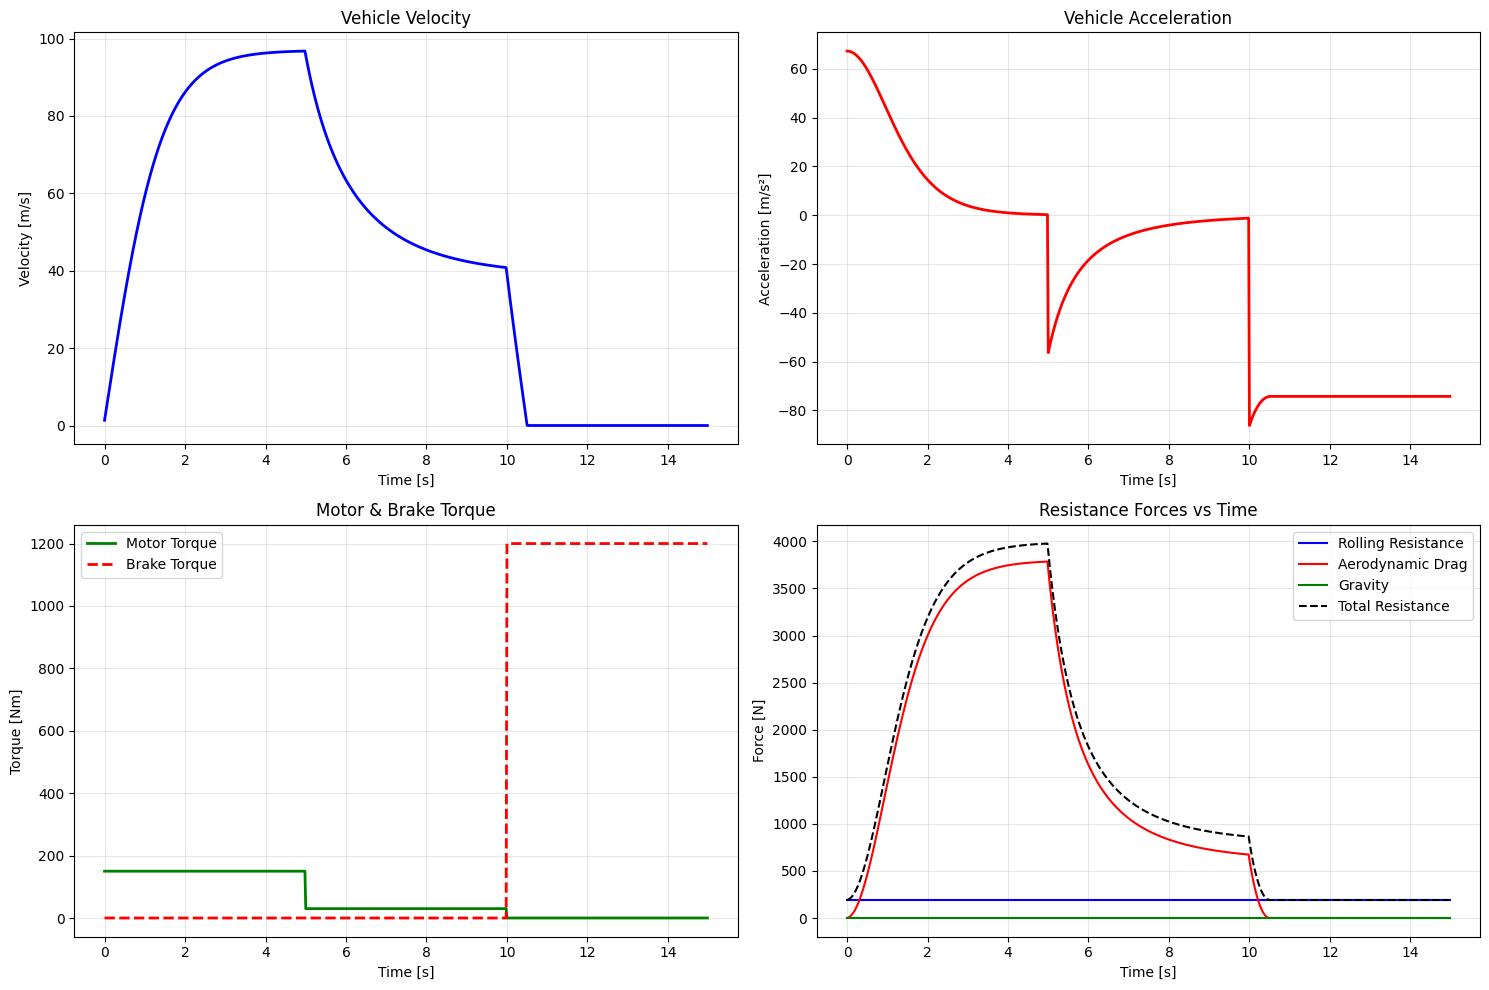

=== Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô ÌÖåÏä§Ìä∏ Í≤∞Í≥º ===
ÏµúÎåÄ ÏÜçÎèÑ: 96.77 m/s
ÏµúÎåÄ Í∞ÄÏÜçÎèÑ: 67.33 m/s¬≤
ÏµúÎåÄ Í∞êÏÜçÎèÑ: -86.23 m/s¬≤
ÏµúÎåÄ Î™®ÌÑ∞ ÌÜ†ÌÅ¨: 150 Nm
ÏµúÎåÄ Î∏åÎ†àÏù¥ÌÅ¨ ÌÜ†ÌÅ¨: 1200 Nm


In [31]:
# Ï¢ÖÎ∞©Ìñ• Î™®Îç∏ ÌÖåÏä§Ìä∏ - Í∞ÄÏÜç/Î∏åÎ†àÏù¥ÌÅ¨ ÏãúÎÇòÎ¶¨Ïò§
def test_longitudinal_dynamics():
    # ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌååÎùºÎØ∏ÌÑ∞
    dt = 0.02  # ÏãúÍ∞Ñ Í∞ÑÍ≤© [s]
    t_total = 15.0  # Ï¥ù ÏãúÍ∞Ñ [s]
    time = np.arange(0, t_total, dt)
    
    # Ï¥àÍ∏∞ Ï°∞Í±¥
    velocity = 0.0  # Ï¥àÍ∏∞ ÏÜçÎèÑ [m/s]
    position = 0.0  # Ï¥àÍ∏∞ ÏúÑÏπò [m]
    
    # Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞
    velocities = []
    positions = []
    accelerations = []
    motor_torques = []
    brake_torques = []
    
    # ÌéòÎã¨ ÏûÖÎ†• ÏãúÎÇòÎ¶¨Ïò§ (0~5Ï¥à: Í∞ÄÏÜç, 5~10Ï¥à: Ïú†ÏßÄ, 10~15Ï¥à: Î∏åÎ†àÏù¥ÌÅ¨)
    for t in time:
        if t < 5.0:
            pedal_input = 0.5  # 50% Í∞ÄÏÜç
        elif t < 10.0:
            pedal_input = 0.1  # 10% Ïú†ÏßÄ
        else:
            pedal_input = -0.3  # 30% Î∏åÎ†àÏù¥ÌÅ¨
        
        # ÌÜ†ÌÅ¨ Í≥ÑÏÇ∞
        motor_torque, brake_torque = long_dynamics.pedal_to_torque(pedal_input) # TODO: long_dynamicsÎ•º ÏÇ¨Ïö©ÌïòÏó¨Ïó¨ Î™®ÌÑ∞ ÌÜ†ÌÅ¨ÏôÄ Î∏åÎ†àÏù¥ÌÅ¨ ÌÜ†ÌÅ¨ Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
        
        # Í∞ÄÏÜçÎèÑ Í≥ÑÏÇ∞
        acceleration, _, F_roll, F_aero, F_grav = long_dynamics.motor_dynamics(motor_torque, brake_torque, velocity) # TODO: long_dynamicsÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏÜçÎèÑ, Ï†ÄÌï≠Î†• Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
        
        # ÏÜçÎèÑ ÏóÖÎç∞Ïù¥Ìä∏ (Euler integration)
        velocity += acceleration * dt # TODO: Ï¢ÖÍ∞ÄÏÜçÎèÑ Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
        velocity = max(0.0, velocity)  # ÌõÑÏßÑ Î∞©ÏßÄ
        position += velocity * dt # TODO: Ï¢ÖÏúÑÏπò Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
        
        # Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
        velocities.append(velocity)
        positions.append(position)
        accelerations.append(acceleration)
        motor_torques.append(motor_torque)
        brake_torques.append(brake_torque)
    
    return time, velocities, positions, accelerations, motor_torques, brake_torques

# ÌÖåÏä§Ìä∏ Ïã§Ìñâ
time_data, vel_data, pos_data, acc_data, motor_data, brake_data = test_longitudinal_dynamics()

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 10))

# ÏÜçÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 1)
plt.plot(time_data, vel_data, 'b-', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Vehicle Velocity')
plt.grid(True, alpha=0.3)

# Í∞ÄÏÜçÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 2)
plt.plot(time_data, acc_data, 'r-', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s¬≤]')
plt.title('Vehicle Acceleration')
plt.grid(True, alpha=0.3)

# Î™®ÌÑ∞ ÌÜ†ÌÅ¨ Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 3)
plt.plot(time_data, motor_data, 'g-', linewidth=2, label='Motor Torque')
plt.plot(time_data, brake_data, 'r--', linewidth=2, label='Brake Torque')
plt.xlabel('Time [s]')
plt.ylabel('Torque [Nm]')
plt.title('Motor & Brake Torque')
plt.legend()
plt.grid(True, alpha=0.3)

# Ï†ÄÌï≠Î†• Î∂ÑÏÑù (ÌäπÏ†ï ÏÜçÎèÑÏóêÏÑú)
velocities_range = np.linspace(0, 30, 100)
F_rolls, F_aeros, F_gravs = [], [], []
for v in vel_data:
    F_roll, F_aero, F_grav = long_dynamics.calculate_resistances(v)
    F_rolls.append(F_roll)
    F_aeros.append(F_aero)
    F_gravs.append(F_grav)

plt.subplot(2, 2, 4)
plt.plot(time_data, F_rolls, 'b-', label='Rolling Resistance')
plt.plot(time_data, F_aeros, 'r-', label='Aerodynamic Drag')
plt.plot(time_data, F_gravs, 'g-', label='Gravity')
plt.plot(time_data, np.array(F_rolls) + np.array(F_aeros) + np.array(F_gravs), 'k--', label='Total Resistance')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.title('Resistance Forces vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô ÌÖåÏä§Ìä∏ Í≤∞Í≥º ===")
print(f"ÏµúÎåÄ ÏÜçÎèÑ: {max(vel_data):.2f} m/s")
print(f"ÏµúÎåÄ Í∞ÄÏÜçÎèÑ: {max(acc_data):.2f} m/s¬≤")
print(f"ÏµúÎåÄ Í∞êÏÜçÎèÑ: {min(acc_data):.2f} m/s¬≤")
print(f"ÏµúÎåÄ Î™®ÌÑ∞ ÌÜ†ÌÅ¨: {max(motor_data):.0f} Nm")
print(f"ÏµúÎåÄ Î∏åÎ†àÏù¥ÌÅ¨ ÌÜ†ÌÅ¨: {max(brake_data):.0f} Nm")


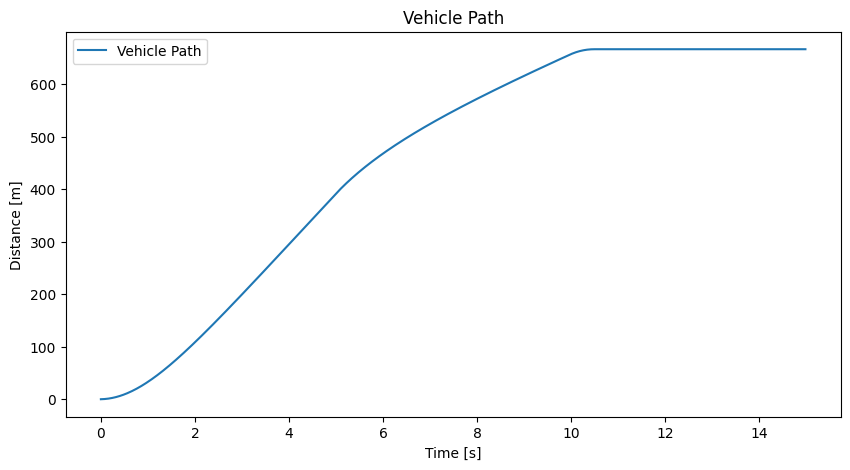

In [21]:
# Í∞Å ÏãúÍ∞ÑÏóêÏÑúÏùò Ï∞®Îüâ ÏúÑÏπò Ï†ïÎ≥¥ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(time_data, pos_data, label='Vehicle Path')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.title('Vehicle Path')
plt.legend()
plt.show()

## 2. Ìö°Î∞©Ìñ• Kinematic & Dynamic Î™®Îç∏ (Lateral Kinematic & Dynamic Models)

Ìö°Î∞©Ìñ• ÎèôÏó≠ÌïôÏùÄ Ï∞®ÎüâÏùò Ï¢åÏö∞ Î∞©Ìñ• ÏõÄÏßÅÏûÑÏùÑ Î™®Îç∏ÎßÅÌï©ÎãàÎã§. ÏÜçÎèÑÏóê Îî∞Îùº kinematic Î™®Îç∏Í≥º dynamic Î™®Îç∏ Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

### 2.1 Kinematic Î™®Îç∏ (v < 5 m/s)

Ï†ÄÏÜçÏóêÏÑúÎäî ÌÉÄÏù¥Ïñ¥Ïùò Ïä¨Î¶ΩÍ∞ÅÏù¥ ÏûëÏïÑ Í∏∞ÌïòÌïôÏ†Å Í¥ÄÍ≥ÑÎßåÏúºÎ°ú Î™®Îç∏ÎßÅÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.

<img src="../resources/ch9/lateral_kinematic_model.PNG" width="50%">

```
œàÃá = V cos(Œ≤) / (l_f + l_r) * tan(Œ¥_f)
·∫ä = V cos(œà + Œ≤)
·∫é = V sin(œà + Œ≤)
Œ≤ = arctan((l_r * tan(Œ¥_f)) / (l_f + l_r))
```

### 2.2 Dynamic Î™®Îç∏ (v ‚â• 5 m/s)

Í≥†ÏÜçÏóêÏÑúÎäî ÌÉÄÏù¥Ïñ¥Ïùò Ï∏°Î†•Í≥º Ïä¨Î¶ΩÍ∞ÅÏùÑ Í≥†Î†§Ìïú ÎèôÏ†Å Î™®Îç∏Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.

<img src="../resources/ch9/lateral_dynamic_model.PNG" width="50%">

```
·∫ä = V_G cos(œà + Œ≤)
·∫é = V_G sin(œà + Œ≤)
Œ≤Ãá = (2C_Œ±f)/(mV_x) * (Œ¥ - Œ≤ - l_f*Œ≥/V_x) + (2C_Œ±r)/(mV_x) * (-Œ≤ + l_r*Œ≥/V_x) - Œ≥
œàÃá = Œ≥
Œ≥Ãá = (2l_f*C_Œ±f)/I_Z * (Œ¥ - Œ≤ - l_f*Œ≥/V_x) - (2l_r*C_Œ±r)/I_Z * (-Œ≤ + l_r*Œ≥/V_x)
```

Ïó¨Í∏∞ÏÑú:
- `Œ≤`: Ïä¨Î¶ΩÍ∞Å [rad]
- `Œ≥ (yaw rate)`: Ïöî Í∞ÅÏÜçÎèÑ [rad/s]
- `C_Œ±f, C_Œ±r`: Ï†ÑÌõÑÎ•ú ÏΩîÎÑàÎßÅ Í∞ïÏÑ± [N/rad]


In [22]:
# Ìö°Î∞©Ìñ• Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
from tutlibs.vehicle_dynamics.custom_simviz import LateralDynamics
lat_dynamics = LateralDynamics() # TODO: Ìï¥Îãπ ÌÅ¥ÎûòÏä§ ÎπàÏπ∏ ÏûëÏÑ±

print("=== Ìö°Î∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å ===")
print(f"Ìú†Î≤†Ïù¥Ïä§: {lat_dynamics.L:.2f} m")
print(f"Ï†ÑÏ∂ï Í±∞Î¶¨: {lat_dynamics.Lf:.2f} m")
print(f"ÌõÑÏ∂ï Í±∞Î¶¨: {lat_dynamics.Lr:.2f} m")
print(f"Ï†ÑÎ•ú ÏΩîÎÑàÎßÅ Í∞ïÏÑ±: {lat_dynamics.Cf:,.0f} N/rad")
print(f"ÌõÑÎ•ú ÏΩîÎÑàÎßÅ Í∞ïÏÑ±: {lat_dynamics.Cr:,.0f} N/rad")
print(f"Î™®Îç∏ Ïä§ÏúÑÏπ≠ ÏÜçÎèÑ: {lat_dynamics.v_switch} m/s")


=== Ìö°Î∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å ===
Ìú†Î≤†Ïù¥Ïä§: 2.70 m
Ï†ÑÏ∂ï Í±∞Î¶¨: 1.30 m
ÌõÑÏ∂ï Í±∞Î¶¨: 1.40 m
Ï†ÑÎ•ú ÏΩîÎÑàÎßÅ Í∞ïÏÑ±: 160,000 N/rad
ÌõÑÎ•ú ÏΩîÎÑàÎßÅ Í∞ïÏÑ±: 170,000 N/rad
Î™®Îç∏ Ïä§ÏúÑÏπ≠ ÏÜçÎèÑ: 5.0 m/s


=== Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê ÌÖåÏä§Ìä∏ (5, 10, 30 m/s) ===
Ï°∞Ìñ•Í∞Å: 10ÎèÑ, ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ: 5Ï¥à
- 5 m/s: Kinematic Î™®Îç∏ ÏÇ¨Ïö©
- 10 m/s: Dynamic Î™®Îç∏ ÏÇ¨Ïö©
- 30 m/s: Dynamic Î™®Îç∏ ÏÇ¨Ïö©


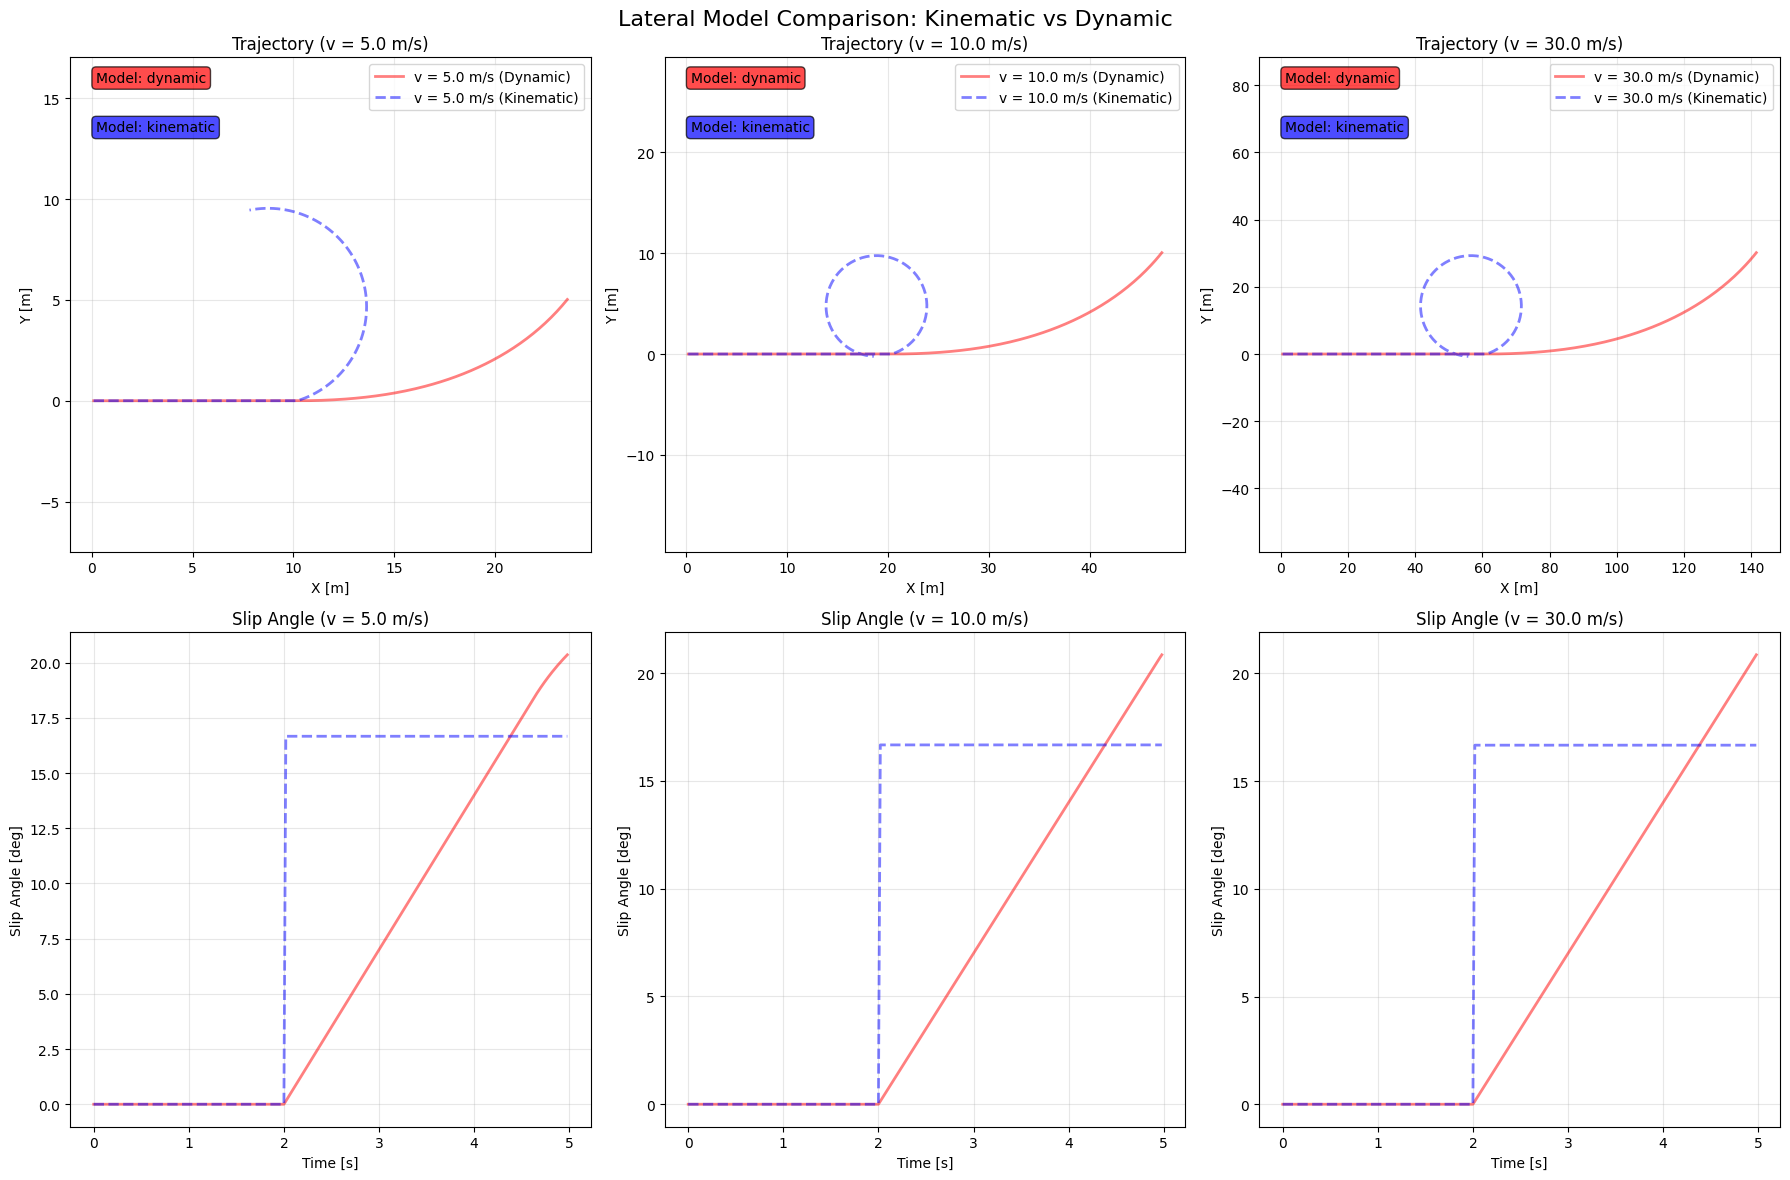

‚úì Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê ÏôÑÎ£å

üîç Í≤∞Í≥º Î∂ÑÏÑù:
- Kinematic Î™®Îç∏ (5 m/s): Í∏∞ÌïòÌïôÏ†Å Í¥ÄÍ≥ÑÎßå Í≥†Î†§, Îã®ÏàúÌïú Í∂§Ï†Å
- Dynamic Î™®Îç∏ (10, 30 m/s): ÌÉÄÏù¥Ïñ¥ Ïä¨Î¶ΩÍ≥º Í¥ÄÏÑ±Î†• Í≥†Î†§, Îçî ÌòÑÏã§Ï†ÅÏù∏ ÏùëÎãµ
- Í≥†ÏÜçÏùºÏàòÎ°ù Ïä¨Î¶ΩÍ∞ÅÏù¥ Ïª§ÏßÄÍ≥† ÏùëÎãµÏù¥ Î≥µÏû°Ìï¥Ïßê


In [23]:
# Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê ÌÖåÏä§Ìä∏ (5, 10, 30 m/s)
from tutlibs.vehicle_dynamics.custom_simviz import plot_lateral_model_comparison

print("=== Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê ÌÖåÏä§Ìä∏ (5, 10, 30 m/s) ===")
print("Ï°∞Ìñ•Í∞Å: 10ÎèÑ, ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ: 5Ï¥à")
print("- 5 m/s: Kinematic Î™®Îç∏ ÏÇ¨Ïö©")
print("- 10 m/s: Dynamic Î™®Îç∏ ÏÇ¨Ïö©") 
print("- 30 m/s: Dynamic Î™®Îç∏ ÏÇ¨Ïö©")

# ÏÜçÎèÑÎ≥Ñ Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê ÏãúÍ∞ÅÌôî
plot_lateral_model_comparison(
    lat_dynamics, 
    velocities=[5.0, 10.0, 30.0],
    steering_angle=np.deg2rad(30.0),
    duration=5.0,
    dt=0.02
)

print("‚úì Ìö°Î∞©Ìñ• Î™®Îç∏ ÎπÑÍµê ÏôÑÎ£å")
print("\nüîç Í≤∞Í≥º Î∂ÑÏÑù:")
print("- Kinematic Î™®Îç∏ (5 m/s): Í∏∞ÌïòÌïôÏ†Å Í¥ÄÍ≥ÑÎßå Í≥†Î†§, Îã®ÏàúÌïú Í∂§Ï†Å")
print("- Dynamic Î™®Îç∏ (10, 30 m/s): ÌÉÄÏù¥Ïñ¥ Ïä¨Î¶ΩÍ≥º Í¥ÄÏÑ±Î†• Í≥†Î†§, Îçî ÌòÑÏã§Ï†ÅÏù∏ ÏùëÎãµ")
print("- Í≥†ÏÜçÏùºÏàòÎ°ù Ïä¨Î¶ΩÍ∞ÅÏù¥ Ïª§ÏßÄÍ≥† ÏùëÎãµÏù¥ Î≥µÏû°Ìï¥Ïßê")


## 3. ÌÜµÌï© Ï∞®Îüâ ÎèôÏó≠Ìïô ÏãúÎÆ¨Î†àÏù¥ÏÖò

Ï¢ÖÎ∞©Ìñ•Í≥º Ìö°Î∞©Ìñ• ÎèôÏó≠ÌïôÏùÑ Í≤∞Ìï©ÌïòÏó¨ Ïã§Ï†ú Ï£ºÌñâÍ≥º Ïú†ÏÇ¨Ìïú ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Í∞ÄÏÜç/Î∏åÎ†àÏù¥ÌÅ¨ÏôÄ Ï°∞Ìñ• ÏûÖÎ†•ÏùÑ ÎèôÏãúÏóê Ï†ÅÏö©ÌïòÏó¨ Ï∞®ÎüâÏùò Î≥µÌï©Ï†ÅÏù∏ ÏõÄÏßÅÏûÑÏùÑ Í¥ÄÏ∞∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.


=== ÌÜµÌï© Ï∞®Îüâ ÎèôÏó≠Ìïô ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÏûë ===
ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ: 20Ï¥à
ÏãúÍ∞Ñ Í∞ÑÍ≤©: 0.02Ï¥à
Ï¥ù Ïä§ÌÖù Ïàò: 1000Í∞ú
‚úì ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏôÑÎ£å
ÏµúÏ¢Ö ÏúÑÏπò: (677.71, 168.51) m
ÏµúÎåÄ ÏÜçÎèÑ: 81.11 m/s
ÏµúÎåÄ Ïä¨Î¶ΩÍ∞Å: 9.50¬∞


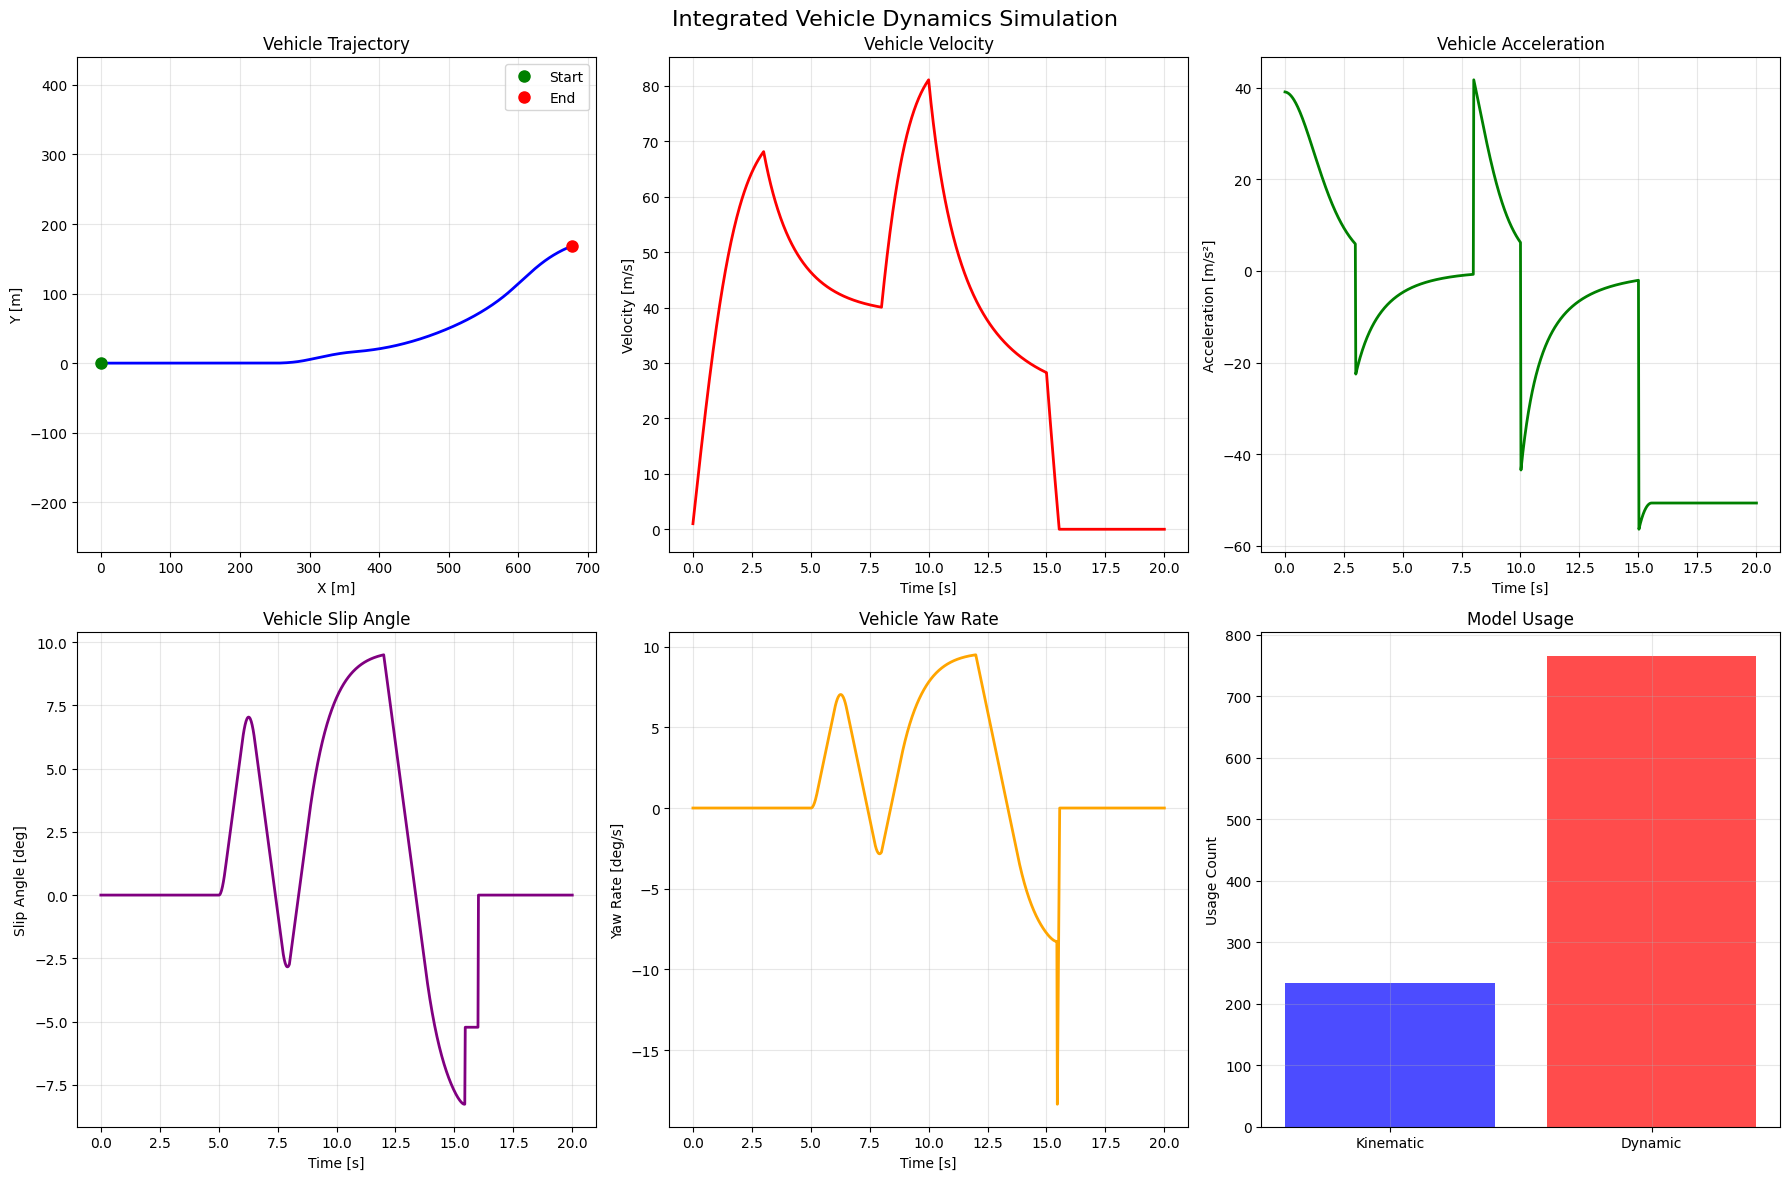

In [24]:
# ÌÜµÌï© Ï∞®Îüâ ÎèôÏó≠Ìïô ÏãúÎÆ¨Î†àÏù¥ÏÖò
from tutlibs.vehicle_dynamics.custom_simviz import VehicleDynamicsSimulator, VehicleState, plot_vehicle_trajectory

# ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ ÏÉùÏÑ±
simulator = VehicleDynamicsSimulator(long_dynamics, lat_dynamics) # TODO: Ï¢ÖÎ∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏Í≥º Ìö°Î∞©Ìñ• ÎèôÏó≠Ìïô Î™®Îç∏ ÏÉùÏÑ±

def create_driving_scenario():
    """Ïã§Ï†ú Ï£ºÌñâÍ≥º Ïú†ÏÇ¨Ìïú ÏãúÎÇòÎ¶¨Ïò§ ÏÉùÏÑ±"""
    dt = 0.02
    duration = 20.0  # 20Ï¥à ÏãúÎÆ¨Î†àÏù¥ÏÖò
    time_steps = int(duration / dt)
    
    pedal_inputs = []
    steering_inputs = []
    
    for i in range(time_steps):
        t = i * dt
        
        # ÌéòÎã¨ ÏûÖÎ†• ÏãúÎÇòÎ¶¨Ïò§
        if t < 3.0:
            pedal = 0.3  # Ï¥àÍ∏∞ Í∞ÄÏÜç
        elif t < 8.0:
            pedal = 0.1  # Îì±ÏÜç Ï£ºÌñâ
        elif t < 10.0:
            pedal = 0.4  # Ï∂îÍ∞Ä Í∞ÄÏÜç
        elif t < 15.0:
            pedal = 0.05  # Ïú†ÏßÄ
        else:
            pedal = -0.2  # Í∞êÏÜç
        
        # Ï°∞Ìñ• ÏûÖÎ†• ÏãúÎÇòÎ¶¨Ïò§ (SÏûê Ïª§Î∏å)
        if t < 5.0:
            steering = 0.0  # ÏßÅÏßÑ
        elif t < 8.0:
            steering = np.deg2rad(15.0) * np.sin(2 * np.pi * (t-5) / 3)  # Ï¢åÏö∞ Ï°∞Ìñ•
        elif t < 12.0:
            steering = np.deg2rad(10.0)  # Ïö∞ÌöåÏ†Ñ
        elif t < 16.0:
            steering = np.deg2rad(-10.0)  # Ï¢åÌöåÏ†Ñ
        else:
            steering = 0.0  # ÏßÅÏßÑ
        
        pedal_inputs.append(pedal)
        steering_inputs.append(steering)
    
    return pedal_inputs, steering_inputs

# Ï£ºÌñâ ÏãúÎÇòÎ¶¨Ïò§ ÏÉùÏÑ±
pedal_scenario, steering_scenario = create_driving_scenario()

# Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
initial_state = VehicleState(
    x=0.0, y=0.0, yaw=0.0,
    velocity=1.0,  # Ï¥àÍ∏∞ ÏÜçÎèÑ 1 m/s
    beta=0.0, yaw_rate=0.0
)

print("=== ÌÜµÌï© Ï∞®Îüâ ÎèôÏó≠Ìïô ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÏûë ===")
print(f"ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ: 20Ï¥à")
print(f"ÏãúÍ∞Ñ Í∞ÑÍ≤©: 0.02Ï¥à")
print(f"Ï¥ù Ïä§ÌÖù Ïàò: {len(pedal_scenario)}Í∞ú")

# ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ
states, sim_infos = simulator.simulate_trajectory(
    initial_state, pedal_scenario, steering_scenario, dt=0.02) # TODO: ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ Ìï®Ïàò ÏôÑÏÑ±

print("‚úì ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏôÑÎ£å")
print(f"ÏµúÏ¢Ö ÏúÑÏπò: ({states[-1].x:.2f}, {states[-1].y:.2f}) m")
print(f"ÏµúÎåÄ ÏÜçÎèÑ: {max(s.velocity for s in states):.2f} m/s")
print(f"ÏµúÎåÄ Ïä¨Î¶ΩÍ∞Å: {max(abs(s.beta) for s in states) * 180/np.pi:.2f}¬∞")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plot_vehicle_trajectory(states, sim_infos, "Integrated Vehicle Dynamics Simulation")


## 4. Ï¢ÖÌö°Î∞©Ìñ• Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò

Ïã§Ï†ú ÏûêÏú®Ï£ºÌñâÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Íµ¨ÌòÑÌïòÍ≥† ÌÖåÏä§Ìä∏Ìï©ÎãàÎã§.

### 4.1 Ìö°Î∞©Ìñ• Ï†úÏñ¥
- **Pure Pursuit**: Lookahead Ìè¨Ïù∏Ìä∏Î•º Ï∂îÏ¢ÖÌïòÎäî Í∏∞ÌïòÌïôÏ†Å Ï†úÏñ¥
- **(Optional) Stanley**: ÌÅ¨Î°úÏä§ Ìä∏Îûô ÏóêÎü¨ÏôÄ Ìó§Îî© ÏóêÎü¨Î•º ÎèôÏãúÏóê Î≥¥Ï†ïÌïòÎäî Ï†úÏñ¥

### 4.2 Ï¢ÖÎ∞©Ìñ• Ï†úÏñ¥  
- **PID Ï†úÏñ¥**: Î™©Ìëú ÏÜçÎèÑ Ï∂îÏ¢ÖÏùÑ ÏúÑÌïú ÎπÑÎ°Ä-Ï†ÅÎ∂Ñ-ÎØ∏Î∂Ñ Ï†úÏñ¥
- **Ï†ÅÏùëÌòï ÏÜçÎèÑ Ï†úÏñ¥**: Í≤ΩÎ°ú Í≥°Î•†Ïóê Îî∞Î•∏ ÏÜçÎèÑ Ï°∞Ï†à


In [26]:
# Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò ÌÖåÏä§Ìä∏
from tutlibs.vehicle_dynamics.custom_lat_pure_pursuit import PurePursuitController
from tutlibs.vehicle_dynamics.custom_long_pid import PIDController, AdaptiveSpeedController

print("=== Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò Í∞úÎ≥Ñ ÌÖåÏä§Ìä∏ ===")

# Pure Pursuit Ï†úÏñ¥Í∏∞ ÌÖåÏä§Ìä∏
print("\n1. Pure Pursuit Ï†úÏñ¥Í∏∞ ÌÖåÏä§Ìä∏")
pp_controller = PurePursuitController(wheelbase=2.7, lookahead_base=5.0, lookahead_gain=0.3) # TODO: Pure Pursuit Ï†úÏñ¥Í∏∞ ÏÉùÏÑ±

# ÌÖåÏä§Ìä∏ Í≤ΩÎ°ú (ÏõêÌòï)
theta = np.linspace(0, 2*np.pi, 100)
radius = 30.0
path_x = radius * np.cos(theta)
path_y = radius * np.sin(theta)

# Ï∞®Îüâ ÏÉÅÌÉú
vehicle_x, vehicle_y = 20.0, 0.0
vehicle_yaw = np.pi/6
vehicle_velocity = 12.0

steering_pp, info_pp = pp_controller.pure_pursuit_control(
    vehicle_x, vehicle_y, vehicle_yaw, vehicle_velocity, path_x, path_y) # TODO: Ìö°Î∞©Ìñ• Ï†úÏñ¥ Ìï®Ïàò ÏôÑÏÑ±

print(f"Pure Pursuit Ï°∞Ìñ•Í∞Å: {np.rad2deg(steering_pp):.2f}¬∞")
print(f"Î£©Ïñ¥Ìó§Îìú Í±∞Î¶¨: {info_pp['lookahead_distance']:.2f} m")
print(f"Ìö°Î∞©Ìñ• Ïò§Ï∞®: {info_pp['lateral_error']:.2f} m")

# PID Ï†úÏñ¥Í∏∞ ÌÖåÏä§Ìä∏
print("\n2. PID Ï†úÏñ¥Í∏∞ ÌÖåÏä§Ìä∏")
pid_controller = PIDController(kp=1.0, ki=1.0, kd=1.0) # TODO: PID Ï†úÏñ¥Í∏∞ ÏÉùÏÑ± - ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï

target_speed = 7.0
current_speed = 10.0
pedal_output, info_pid = pid_controller.update(target_speed, current_speed) # TODO: Ï¢ÖÎ∞©Ìñ• Ï†úÏñ¥ Ìï®Ïàò ÏôÑÏÑ±

print(f"Î™©Ìëú ÏÜçÎèÑ: {target_speed:.1f} m/s")
print(f"ÌòÑÏû¨ ÏÜçÎèÑ: {current_speed:.1f} m/s")
print(f"ÏÜçÎèÑ Ïò§Ï∞®: {info_pid['error']:.2f} m/s")
print(f"PID Ï∂úÎ†•: {pedal_output:.3f}")

print("\n‚úì Î™®Îì† Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò ÌÖåÏä§Ìä∏ ÏôÑÎ£å")

=== Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò Í∞úÎ≥Ñ ÌÖåÏä§Ìä∏ ===

1. Pure Pursuit Ï†úÏñ¥Í∏∞ ÌÖåÏä§Ìä∏
Pure Pursuit Ï°∞Ìñ•Í∞Å: -15.11¬∞
Î£©Ïñ¥Ìó§Îìú Í±∞Î¶¨: 8.60 m
Ìö°Î∞©Ìñ• Ïò§Ï∞®: -5.00 m

2. PID Ï†úÏñ¥Í∏∞ ÌÖåÏä§Ìä∏
Î™©Ìëú ÏÜçÎèÑ: 7.0 m/s
ÌòÑÏû¨ ÏÜçÎèÑ: 10.0 m/s
ÏÜçÎèÑ Ïò§Ï∞®: -3.00 m/s
PID Ï∂úÎ†•: -1.000

‚úì Î™®Îì† Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò ÌÖåÏä§Ìä∏ ÏôÑÎ£å


## 5. ÌÜµÌï© Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖò

Ï∞®Îüâ ÎèôÏó≠Ìïô Î™®Îç∏Í≥º Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Í≤∞Ìï©ÌïòÏó¨ Ïã§Ï†ú Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ ÏàòÌñâÌï©ÎãàÎã§. (Optional) Í∏∞Ï°¥ CSV Í≤ΩÎ°ú ÌååÏùºÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Pure PursuitÍ≥º Stanley Ï†úÏñ¥Í∏∞Ïùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÎ∂ÑÏÑùÌï©ÎãàÎã§.


=== Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖò ===
Í≤ΩÎ°ú Ìè¨Ïù∏Ìä∏ Ïàò: 1292Í∞ú
Í≤ΩÎ°ú Î≤îÏúÑ: X(-484.4~-290.7), Y(-9.7~142.4)


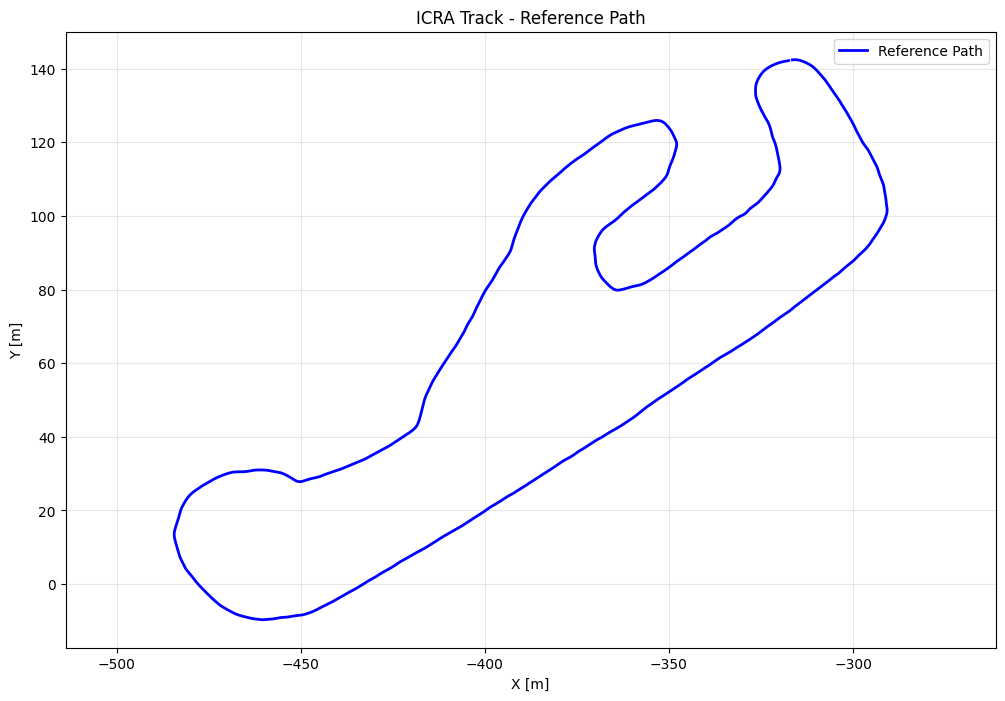

‚úì Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å


In [27]:
# Í≤ΩÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
def load_path_csv(csv_path):
    """CSV Í≤ΩÎ°ú ÌååÏùº Î°úÎìú"""
    try:
        data = np.loadtxt(csv_path, delimiter=',', skiprows=1)
        return data[:, 0], data[:, 1]  # x, y Ï¢åÌëú
    except:
        data = np.loadtxt(csv_path, delimiter=',')
        return data[:, 0], data[:, 1]

# ICRA Í≤ΩÎ°ú Î°úÎìú
path_x, path_y = load_path_csv("./../data/control_trajectory/racetrack_centerline.csv")
# path_x, path_y = load_path_csv("./../data/control_trajectory/path_straight.csv")
# path_x, path_y = load_path_csv("./../data/control_trajectory/path_circle.csv")

print("=== Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖò ===")
print(f"Í≤ΩÎ°ú Ìè¨Ïù∏Ìä∏ Ïàò: {len(path_x)}Í∞ú")
print(f"Í≤ΩÎ°ú Î≤îÏúÑ: X({np.min(path_x):.1f}~{np.max(path_x):.1f}), Y({np.min(path_y):.1f}~{np.max(path_y):.1f})")

# Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.plot(path_x, path_y, 'b-', linewidth=2, label='Reference Path')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('ICRA Track - Reference Path')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.show()

# ÌÜµÌï© Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ ÌÅ¥ÎûòÏä§
class PathFollowingSimulator:
    def __init__(self, vehicle_dynamics, lateral_controller, longitudinal_controller):
        self.vehicle_dynamics = vehicle_dynamics
        self.lateral_controller = lateral_controller
        self.longitudinal_controller = longitudinal_controller
        self.speed_controller = AdaptiveSpeedController(base_speed=12.0, curvature_factor=30.0) # TODO: Ï†ÅÏùëÌòï ÏÜçÎèÑ Ï†úÏñ¥Í∏∞ ÏÉùÏÑ±
        
    def find_closest_path_index(self, vehicle_x, vehicle_y, path_x, path_y):
        """Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≤ΩÎ°ú Ïù∏Îç±Ïä§ Ï∞æÍ∏∞"""
        distances = np.sqrt((path_x-vehicle_x)**2 + (path_y-vehicle_y)**2 ) # TODO: Í±∞Î¶¨ Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
        return np.argmin(distances)
    
    def simulate_path_following(self, path_x, path_y, initial_state, duration=30.0, dt=0.02):
        """Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÏÖò"""
        time_steps = int(duration / dt)
        states = [initial_state]
        control_infos = []
        
        current_state = initial_state
        self.longitudinal_controller.reset()  # PID Ï¥àÍ∏∞Ìôî
        
        for step in range(time_steps):
            # ÌòÑÏû¨ ÏúÑÏπòÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≤ΩÎ°úÏ†ê Ï∞æÍ∏∞
            closest_idx = self.find_closest_path_index(
                current_state.x, current_state.y, path_x, path_y) # TODO: Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≤ΩÎ°úÏ†ê Ï∞æÍ∏∞
            
            # Î™©Ìëú ÏÜçÎèÑ Í≥ÑÏÇ∞ (Í≥°Î•† Í∏∞Î∞ò)
            target_speed = self.speed_controller.get_target_speed(path_x, path_y, closest_idx) # TODO: Î™©Ìëú ÏÜçÎèÑ Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
            
            # Ìö°Î∞©Ìñ• Ï†úÏñ¥ (Ï°∞Ìñ•Í∞Å Í≥ÑÏÇ∞)
            if isinstance(self.lateral_controller, PurePursuitController):
                steering_angle, lat_info = self.lateral_controller.pure_pursuit_control(
                    current_state.x, current_state.y, current_state.yaw, 
                    current_state.velocity, path_x, path_y) # TODO: Pure Pursuit Ï†úÏñ¥ Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
            else:
                steering_angle, lat_info = 0.0, {}
            
            # Ï¢ÖÎ∞©Ìñ• Ï†úÏñ¥ (ÌéòÎã¨ ÏûÖÎ†• Í≥ÑÏÇ∞)
            pedal_input, long_info = self.longitudinal_controller.update(
                target_speed, current_state.velocity) # TODO: Ï¢ÖÎ∞©Ìñ• Ï†úÏñ¥ Ìï®Ïàò ÏôÑÏÑ±
            
            # Ï∞®Îüâ ÎèôÏó≠Ìïô ÏãúÎÆ¨Î†àÏù¥ÏÖò
            new_state, sim_info = self.vehicle_dynamics.simulate_step(
                current_state, pedal_input, steering_angle, dt) # TODO: Ï∞®Îüâ ÎèôÏó≠Ìïô ÏãúÎÆ¨Î†àÏù¥ÏÖò Ìï®Ïàò ÏôÑÏÑ±
            
            # Í≤ΩÎ°ú Ïù¥ÌÉà Ï≤¥ÌÅ¨ (ÎÑàÎ¨¥ Î©ÄÎ¶¨ Î≤óÏñ¥ÎÇòÎ©¥ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï¢ÖÎ£å)
            closest_distance = np.sqrt((new_state.x - path_x[closest_idx])**2 + 
                                     (new_state.y - path_y[closest_idx])**2)
            if closest_distance > 20.0:  # 20m Ïù¥ÏÉÅ Î≤óÏñ¥ÎÇòÎ©¥ Ï¢ÖÎ£å
                print(f"Í≤ΩÎ°ú Ïù¥ÌÉàÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï¢ÖÎ£å (step: {step}, distance: {closest_distance:.1f}m)")
                break
            
            # ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
            current_state = new_state
            states.append(current_state)
            
            # Ï†úÏñ¥ Ï†ïÎ≥¥ Ï†ÄÏû•
            control_info = {
                'closest_idx': closest_idx,
                'target_speed': target_speed,
                'lateral_info': lat_info,
                'longitudinal_info': long_info,
                'steering_angle': steering_angle,
                'pedal_input': pedal_input
            }
            control_infos.append(control_info)
            
            # Î™©ÌëúÏ†ê Í∑ºÏ≤ò ÎèÑÎã¨ Ïãú Ï¢ÖÎ£å
            if closest_idx >= len(path_x) - 10:
                print(f"Î™©ÌëúÏ†ê ÎèÑÎã¨Î°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï¢ÖÎ£å (step: {step})")
                break
        
        return states, control_infos

print("‚úì Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÎÆ¨Î†àÏù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å")


=== Pure Pursuit Ï†úÏñ¥Í∏∞ Í≤∞Í≥º ===

Pure Pursuit Ï†úÏñ¥Í∏∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ Ï§ë...
Pure Pursuit ÏôÑÎ£å: 2001Í∞ú Ïä§ÌÖù


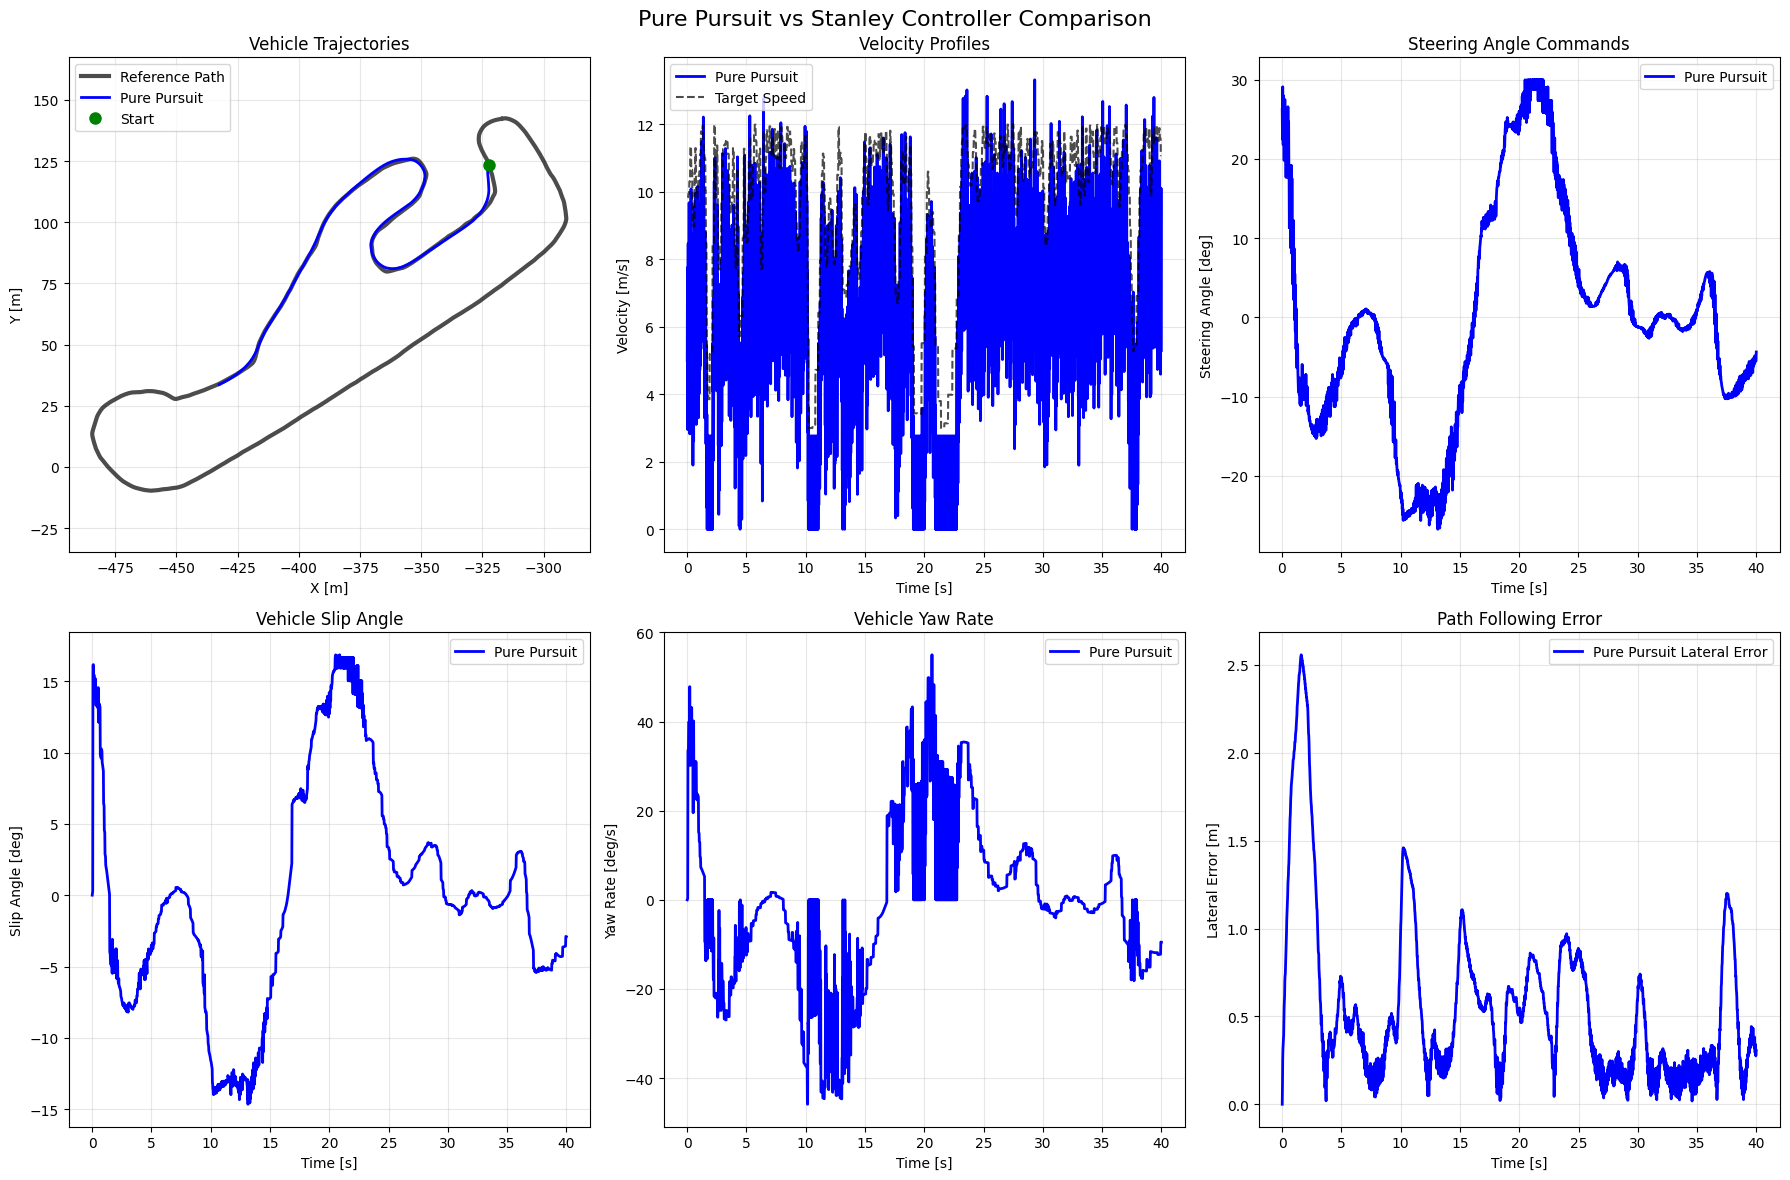


=== ÏÑ±Îä• ÎπÑÍµê Í≤∞Í≥º ===
ÏßÄÌëú                   Pure Pursuit   
--------------------------------------------------
ÏôÑÏ£º ÏãúÍ∞Ñ [s]            40.00          
ÌèâÍ∑† ÏÜçÎèÑ [m/s]          6.27           
ÏµúÎåÄ ÏÜçÎèÑ [m/s]          13.32          
ÌèâÍ∑† Ìö°Î∞©Ìñ• Ïò§Ï∞® [m]        0.557          
ÏµúÎåÄ Ìö°Î∞©Ìñ• Ïò§Ï∞® [m]        2.558          
ÌèâÍ∑† Ïä¨Î¶ΩÍ∞Å [deg]         5.93           


In [30]:
# Pure Pursuit Ï†úÏñ¥Í∏∞ Í≤∞Í≥º ÏãúÎÆ¨Î†àÏù¥ÏÖò
print("=== Pure Pursuit Ï†úÏñ¥Í∏∞ Í≤∞Í≥º ===")

# Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
initial_state = VehicleState(
    x=path_x[-50], y=path_y[-50], yaw=-120 * np.pi / 180,
    velocity=5.0, beta=0.0, yaw_rate=0.0
)

# Pure Pursuit ÏãúÎÆ¨Î†àÏù¥ÏÖò
print("\nPure Pursuit Ï†úÏñ¥Í∏∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ Ï§ë...")
pp_controller = PurePursuitController(wheelbase=lat_dynamics.L, lookahead_base=6.0, lookahead_gain=0.4)
pid_controller_pp = PIDController(kp=2.0, ki=0.1, kd=0.05)
simulator_pp = PathFollowingSimulator(simulator, pp_controller, pid_controller_pp)

states_pp, infos_pp = simulator_pp.simulate_path_following(
    path_x, path_y, initial_state, duration=40.0, dt=0.02)

print(f"Pure Pursuit ÏôÑÎ£å: {len(states_pp)}Í∞ú Ïä§ÌÖù")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
def plot_comparison_results(path_x, path_y, states_pp, infos_pp):
    """Îëê Ï†úÏñ¥Í∏∞ Í≤∞Í≥º ÎπÑÍµê ÏãúÍ∞ÅÌôî"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Pure Pursuit vs Stanley Controller Comparison', fontsize=16)
    
    # Í∂§Ï†Å ÎπÑÍµê
    axes[0, 0].plot(path_x, path_y, 'k-', linewidth=3, alpha=0.7, label='Reference Path')
    axes[0, 0].plot([s.x for s in states_pp], [s.y for s in states_pp], 
                   'b-', linewidth=2, label='Pure Pursuit')
    axes[0, 0].plot(states_pp[0].x, states_pp[0].y, 'go', markersize=8, label='Start')
    axes[0, 0].set_xlabel('X [m]')
    axes[0, 0].set_ylabel('Y [m]')
    axes[0, 0].set_title('Vehicle Trajectories')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axis('equal')
    axes[0, 0].legend()
    
    # ÏÜçÎèÑ ÎπÑÍµê
    time_pp = np.arange(len(states_pp)) * 0.02
    
    axes[0, 1].plot(time_pp, [s.velocity for s in states_pp], 'b-', linewidth=2, label='Pure Pursuit')
    if infos_pp:
        axes[0, 1].plot(time_pp[1:], [info['target_speed'] for info in infos_pp], 
                       'k--', alpha=0.7, label='Target Speed')
    axes[0, 1].set_xlabel('Time [s]')
    axes[0, 1].set_ylabel('Velocity [m/s]')
    axes[0, 1].set_title('Velocity Profiles')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    
    # Ï°∞Ìñ•Í∞Å ÎπÑÍµê
    if infos_pp:
        axes[0, 2].plot(time_pp[1:], [np.rad2deg(info['steering_angle']) for info in infos_pp], 
                       'b-', linewidth=2, label='Pure Pursuit')
        axes[0, 2].set_xlabel('Time [s]')
        axes[0, 2].set_ylabel('Steering Angle [deg]')
        axes[0, 2].set_title('Steering Angle Commands')
        axes[0, 2].grid(True, alpha=0.3)
        axes[0, 2].legend()
    
    # Ïä¨Î¶ΩÍ∞Å ÎπÑÍµê
    axes[1, 0].plot(time_pp, [np.rad2deg(s.beta) for s in states_pp], 'b-', linewidth=2, label='Pure Pursuit')
    axes[1, 0].set_xlabel('Time [s]')
    axes[1, 0].set_ylabel('Slip Angle [deg]')
    axes[1, 0].set_title('Vehicle Slip Angle')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    
    # Ïöî Í∞ÅÏÜçÎèÑ ÎπÑÍµê
    axes[1, 1].plot(time_pp, [np.rad2deg(s.yaw_rate) for s in states_pp], 'b-', linewidth=2, label='Pure Pursuit')
    axes[1, 1].set_xlabel('Time [s]')
    axes[1, 1].set_ylabel('Yaw Rate [deg/s]')
    axes[1, 1].set_title('Vehicle Yaw Rate')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()
    
    # Ìö°Î∞©Ìñ• Ïò§Ï∞® ÎπÑÍµê (Í≤ΩÎ°úÏôÄÏùò Í±∞Î¶¨)
    def calculate_lateral_errors(states, path_x, path_y):
        errors = []
        for state in states:
            distances = np.sqrt((path_x - state.x)**2 + (path_y - state.y)**2)
            errors.append(np.min(distances))
        return errors
    
    # ÌÅ¨Î°úÏä§ Ìä∏Îûô ÏóêÎü¨ Í≥ÑÏÇ∞
    def calculate_path_yaw(path_x, path_y, closest_idx):
        """Í≤ΩÎ°úÏùò Ïöî Í∞ÅÎèÑ Í≥ÑÏÇ∞"""
        if closest_idx < len(path_x) - 1:
            # ÌòÑÏû¨ Ï†êÍ≥º Îã§Ïùå Ï†êÏúºÎ°ú Í≤ΩÎ°ú Î∞©Ìñ• Í≥ÑÏÇ∞
            dx = path_x[closest_idx + 1] - path_x[closest_idx]
            dy = path_y[closest_idx + 1] - path_y[closest_idx]
            path_yaw = np.arctan2(dy, dx)
        elif closest_idx > 0:
            # ÎßàÏßÄÎßâ Ï†êÏù∏ Í≤ΩÏö∞ Ïù¥Ï†Ñ Ï†êÍ≥º ÌòÑÏû¨ Ï†êÏúºÎ°ú Í≥ÑÏÇ∞
            dx = path_x[closest_idx] - path_x[closest_idx - 1]
            dy = path_y[closest_idx] - path_y[closest_idx - 1]
            path_yaw = np.arctan2(dy, dx)
        else:
            # Îã®Ïùº Ï†êÏù∏ Í≤ΩÏö∞
            path_yaw = 0.0
            
        return path_yaw

    def calculate_cross_track_error(states, path_x, path_y):
        """ÌÅ¨Î°úÏä§ Ìä∏Îûô ÏóêÎü¨ Í≥ÑÏÇ∞ (Î∂ÄÌò∏ Ìè¨Ìï®)"""
        # Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≤ΩÎ°úÏ†êÏóêÏÑú Ï∞®ÎüâÏúºÎ°úÏùò Î≤°ÌÑ∞
        errors = []
        for state in states:
            xxxxxx # TODO: ÌÅ¨Î°úÏä§ Ìä∏Îûô ÏóêÎü¨ Í≥ÑÏÇ∞Ïãù ÏûëÏÑ±
        return errors
    
    errors_pp = calculate_lateral_errors(states_pp, path_x, path_y)
    
    axes[1, 2].plot(time_pp, errors_pp, 'b-', linewidth=2, label='Pure Pursuit Lateral Error')
    axes[1, 2].set_xlabel('Time [s]')
    axes[1, 2].set_ylabel('Lateral Error [m]')
    axes[1, 2].set_title('Path Following Error')
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    print("\n=== ÏÑ±Îä• ÎπÑÍµê Í≤∞Í≥º ===")
    print(f"{'ÏßÄÌëú':<20} {'Pure Pursuit':<15}")
    print("-" * 50)
    print(f"{'ÏôÑÏ£º ÏãúÍ∞Ñ [s]':<20} {time_pp[-1]:<15.2f}")
    print(f"{'ÌèâÍ∑† ÏÜçÎèÑ [m/s]':<20} {np.mean([s.velocity for s in states_pp]):<15.2f}")
    print(f"{'ÏµúÎåÄ ÏÜçÎèÑ [m/s]':<20} {max(s.velocity for s in states_pp):<15.2f}")
    print(f"{'ÌèâÍ∑† Ìö°Î∞©Ìñ• Ïò§Ï∞® [m]':<20} {np.mean(errors_pp):<15.3f}")
    print(f"{'ÏµúÎåÄ Ìö°Î∞©Ìñ• Ïò§Ï∞® [m]':<20} {max(errors_pp):<15.3f}")
    print(f"{'ÌèâÍ∑† Ïä¨Î¶ΩÍ∞Å [deg]':<20} {np.mean([abs(s.beta) for s in states_pp])*180/np.pi:<15.2f}")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plot_comparison_results(path_x, path_y, states_pp, infos_pp)


ÏïÑÎûòÏùò Î™ÖÎ†πÏñ¥Î•º ÌÑ∞ÎØ∏ÎÑêÏóê ÏûÖÎ†•ÌïòÏó¨ Ïã§ÏãúÍ∞ÑÏúºÎ°ú ÌÜµÌï© Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏãúÏä§ÌÖúÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
$ conda activate adas_practice
$ python practice/tutlibs/vehicle_dynamics/main_path_following_simulator.py

## Ïã§Ïäµ ÏöîÏïΩ Î∞è Í≤∞Î°†

### üéØ Ïã§ÏäµÏóêÏÑú ÏßÑÌñâÌïú ÎÇ¥Ïö©

1. **Ï∞®Îüâ ÎèôÏó≠Ìïô Î™®Îç∏ÎßÅ**
   - **Ï¢ÖÎ∞©Ìñ• Dynamic Î™®Îç∏**: Î™®ÌÑ∞ ÌÜ†ÌÅ¨, Í≥µÍ∏∞Ï†ÄÌï≠, Íµ¨Î¶ÑÏ†ÄÌï≠ÏùÑ Í≥†Î†§Ìïú 1Ï∞®Ïõê ÎèôÏó≠Ìïô
   - **Ìö°Î∞©Ìñ• Kinematic Î™®Îç∏**: Ï†ÄÏÜç(v < 5m/s)ÏóêÏÑú Í∏∞ÌïòÌïôÏ†Å Í¥ÄÍ≥Ñ Í∏∞Î∞ò Î™®Îç∏
   - **Ìö°Î∞©Ìñ• Dynamic Î™®Îç∏**: Í≥†ÏÜç(v ‚â• 5m/s)ÏóêÏÑú ÌÉÄÏù¥Ïñ¥ Ïä¨Î¶ΩÍ∞ÅÍ≥º Ï∏°Î†• Í≥†Î†§

2. **Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ**
   - **Pure Pursuit**: Î£©Ïñ¥Ìó§Îìú Ìè¨Ïù∏Ìä∏ Í∏∞Î∞ò Í∏∞ÌïòÌïôÏ†Å Ï†úÏñ¥
   - **PID Ï†úÏñ¥**: Ï¢ÖÎ∞©Ìñ• ÏÜçÎèÑ Ï†úÏñ¥, Í≥°Î•† Í∏∞Î∞ò Ï†ÅÏùëÌòï ÏÜçÎèÑ Ï°∞Ï†à

3. **ÌÜµÌï© ÏãúÎÆ¨Î†àÏù¥ÏÖò**
   - Ï¢ÖÌö°Î∞©Ìñ• ÎèôÏó≠ÌïôÍ≥º Ï†úÏñ¥ ÏïåÍ≥†Î¶¨Ï¶òÏùò Ïã§ÏãúÍ∞Ñ Í≤∞Ìï©
   - Ïã§Ï†ú Í≤ΩÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú Í≤ΩÎ°ú Ï∂îÏ¢Ö ÏÑ±Îä• Í≤ÄÏ¶ù
   - Ï†úÏñ¥Í∏∞Î≥Ñ ÌäπÏÑ± ÎπÑÍµê Î∞è ÏÑ±Îä• Î∂ÑÏÑù
